In [63]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
data = pd.read_csv('assortivity_summary.csv')
ass_measures = {'Sweden': 0, 'US': 0, 'France': 0, 'Switzerland': 0, 'UK': 0, 'Denmark': 0, 'Austria': 0}
count_measures = {'Sweden': 0, 'US': 0, 'France': 0, 'Switzerland': 0, 'UK': 0, 'Denmark': 0, 'Austria': 0}
for count, x in enumerate(data.index):
    ass = data.iloc[count]['Assortivity Measure']
    if re.match(r'^net_se', x):
        ass_measures['Sweden'] += ass
        count_measures['Sweden'] += 1
    elif re.match(r'^us', x):
        ass_measures['US'] += ass
        count_measures['US'] += 1
    elif re.match(r'^net_fr', x):
        ass_measures['France'] += ass
        count_measures['France'] += 1
    elif re.match(r'^net_ch', x):
        ass_measures['Switzerland'] += ass
        count_measures['Switzerland'] += 1
    elif re.match(r'^uk', x):
        ass_measures['UK'] += ass
        count_measures['UK'] += 1
    elif re.match(r'^net_dk', x):
        ass_measures['Denmark'] += ass
        count_measures['Denmark'] += 1
    elif re.match(r'^net_at', x):
        ass_measures['Austria'] += ass
        count_measures['Austria'] += 1
assortativity = pd.DataFrame([ass_measures[key]/count_measures[key] for key, val in ass_measures.items()],
                            index = ['Sweden','US','France','Switzerland','UK','Denmark','Austria'],
                            columns = ['Assortativity'])
assortativity = assortativity.sort_values(by = ['Assortativity'])
assortativity

,Assortativity
Austria,-0.443655
UK,-0.409526
US,-0.000767
Switzerland,0.298099
Denmark,0.598638
France,0.608509
Sweden,0.782377


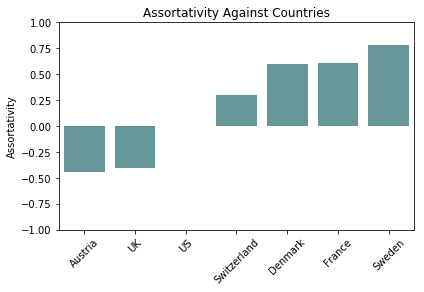

In [74]:
x = assortativity.index
y = "Assortativity"
plot = sns.barplot(x = x, y = y, data = assortativity, color = "cadetblue")
plt.ylim(-1, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.title("Assortativity Against Countries")
fig = plot.get_figure()
fig.savefig('plots/assortativity/all_countries.png')